In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('data.csv', delimiter=',')

In [5]:
#2Виведіть опис прочитаних даних. 

print(df.describe())


                Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  1350.000000       1350.000000                           1350.000000   
mean    675.500000          0.060000                              3.577895   
std     389.855743          0.237575                             84.914699   
min       1.000000          0.000000                              0.000000   
25%     338.250000          0.000000                              0.031140   
50%     675.500000          0.000000                              0.156891   
75%    1012.750000          0.000000                              0.543145   
max    1350.000000          1.000000                           2340.000000   

               age  NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  \
count  1350.000000                           1350.000000   1350.000000   
mean     52.048889                              0.257778    356.123363   
std      15.009875                              0.751718   1156.603074   
m

In [6]:
#3 Відобразіть декілька перших и декілька останніх записів.

print("Перші 5 записів:")
print(df.head())

print("\nОстанні 5 записів:")
print(df.tail())

Перші 5 записів:
   Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0   1                 1                              0.766127   45   
1   2                 0                              0.957151   40   
2   3                 0                              0.658180   38   
3   4                 0                              0.233810   30   
4   5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                    

In [12]:
# 4Прочитайте в файлі `DataDictionary-ru.txt`, що означают стовпчики матриці, якому типу належить кожний стовпчик (дійсний, цілий, категорійний)?

with open('DataDictionary-uk.txt', 'r', encoding='utf-8') as file:
    # Читаємо весь вміст файлу
    content = file.read()

# Виводимо вміст файлу
print(content)

SeriousDlqin2yrs    
Чи відбудется перевищення терміну платежу на 90 або більше діб у найблищі 2 роки (Y/N)

RevolvingUtilizationOfUnsecuredLines    
Відсоток залишку грошейг на усіх кредитних картах   (%)

age 
Вік (integer)

NumberOfTime30-59DaysPastDueNotWorse    
Кількість короткострокових затримок платежів (30-59 діб) за останні 2 роки   (integer)

DebtRatio   
Відсотки від боргу, аліменти, побутові витрати, що вилачуються за місяц поділені на місячний дохід (якщо місячний дохід невідомий, то абсолютна величина виплат)  (%)

MonthlyIncome   
Месячний дохід  (real)

NumberOfOpenCreditLinesAndLoans 
Кількість кредитів (або кредитних карт) за виключенням іпотеки (integer)

NumberOfTimes90DaysLate 
Кредитна історія: кількість серьозних прострочек платежів на 90 або більше діб (integer)

NumberRealEstateLoansOrLines    
Кількість іпотек   (integer)

NumberOfTime60-89DaysPastDueNotWorse    
Кількість середнесрокових прострочених платежів (60-89 діб) за останні 2 роки (integer)

NumberOf

In [14]:
#5 Виправьте дані, зробив всі значення стовпчика `DebtRatio` абсолютними (помножте їх на `MonthlyIncome`).  Щоб ваша програма швидко працювала на повних даних, спробуйте не використовувати цикл.

# Виправляємо значення стовпця DebtRatio
df['DebtRatio'] = df['DebtRatio'] * df['MonthlyIncome']

# Виводимо оновлений DataFrame
print(df)

        Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0        1                 1                              0.766127   45   
1        2                 0                              0.957151   40   
2        3                 0                              0.658180   38   
3        4                 0                              0.233810   30   
4        5                 0                              0.907239   49   
...    ...               ...                                   ...  ...   
1345  1346                 0                              0.000000   39   
1346  1347                 0                              0.045694   49   
1347  1348                 0                              0.022780   53   
1348  1349                 0                              0.036934   56   
1349  1350                 0                              0.000000   62   

      NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                        

In [16]:
#6 Зменіть ім'я стовпчика на Debt.

df.rename(columns={'DebtRatio': 'Debt'}, inplace=True)

# Виводимо оновлений DataFrame
print(df)
print(df['Debt'])

        Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0        1                 1                              0.766127   45   
1        2                 0                              0.957151   40   
2        3                 0                              0.658180   38   
3        4                 0                              0.233810   30   
4        5                 0                              0.907239   49   
...    ...               ...                                   ...  ...   
1345  1346                 0                              0.000000   39   
1346  1347                 0                              0.045694   49   
1347  1348                 0                              0.022780   53   
1348  1349                 0                              0.036934   56   
1349  1350                 0                              0.000000   62   

      NumberOfTime30-59DaysPastDueNotWorse         Debt  MonthlyIncome  \
0                        

In [18]:
#7Розрахуйте средній щомісячний дохід і присвойте всім клієнтам з невідомим доходом отримане число.

# Розраховуємо середній щомісячний дохід
average_income = df['MonthlyIncome'].mean()

# Заповнюємо невідомі значення в стовпці 'MonthlyIncome' середнім значенням
df['MonthlyIncome'].fillna(average_income, inplace=True)

# Виводимо оновлений DataFrame
print(df)

        Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0        1                 1                              0.766127   45   
1        2                 0                              0.957151   40   
2        3                 0                              0.658180   38   
3        4                 0                              0.233810   30   
4        5                 0                              0.907239   49   
...    ...               ...                                   ...  ...   
1345  1346                 0                              0.000000   39   
1346  1347                 0                              0.045694   49   
1347  1348                 0                              0.022780   53   
1348  1349                 0                              0.036934   56   
1349  1350                 0                              0.000000   62   

      NumberOfTime30-59DaysPastDueNotWorse         Debt  MonthlyIncome  \
0                        

In [20]:
#8 Використовуючи метод groupby, оцініть імовірності неповернення кредиту (SeriousDlqin2yrs=1) для різних значень кількості утриманців (NumberOfDependents).

#Зробіть аналогічну процедуру для різних значень стовпчика NumberRealEstateLoansOrLines
# Групуємо дані за кількістю утриманців та обчислюємо середню імовірність неповернення кредиту
dependents_prob = df.groupby('NumberOfDependents')['SeriousDlqin2yrs'].mean()

# Групуємо дані за кількістю нерухомості та обчислюємо середню імовірність неповернення кредиту
real_estate_loans_prob = df.groupby('NumberRealEstateLoansOrLines')['SeriousDlqin2yrs'].mean()

# Виводимо результати
print("Імовірність неповернення кредиту за кількістю утриманців:")
print(dependents_prob)

print("\nІмовірність неповернення кредиту за кількістю нерухомості:")
print(real_estate_loans_prob)

Імовірність неповернення кредиту за кількістю утриманців:
NumberOfDependents
0.0    0.041397
1.0    0.089844
2.0    0.110465
3.0    0.057143
4.0    0.033333
5.0    0.000000
6.0    0.000000
8.0    0.000000
Name: SeriousDlqin2yrs, dtype: float64

Імовірність неповернення кредиту за кількістю нерухомості:
NumberRealEstateLoansOrLines
0    0.056863
1    0.048729
2    0.063158
3    0.145455
4    0.105263
5    0.000000
6    1.000000
8    0.000000
Name: SeriousDlqin2yrs, dtype: float64


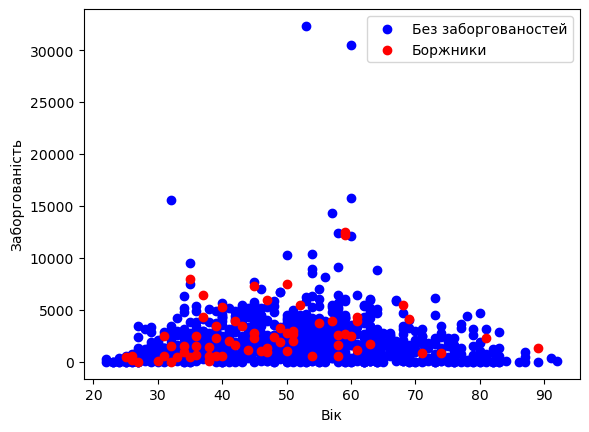

In [22]:
#9a Побудуйте графік розсіювання на вісях age и Debt. Cинім відмитьте клиентів без серйозних заборгованостей (SeriousDlqin2yrs = 0) а червоним — боржнків (SeriousDlqin2yrs = 1).

# Розділяємо дані на дві групи: без заборгованостей (0) і боржники (1)
no_default = df[df['SeriousDlqin2yrs'] == 0]
default = df[df['SeriousDlqin2yrs'] == 1]

# Побудова графіку розсіювання для кожної групи
plt.scatter(no_default['age'], no_default['Debt'], c='blue', label='Без заборгованостей')
plt.scatter(default['age'], default['Debt'], c='red', label='Боржники')

# Додамо підписи та легенду
plt.xlabel('Вік')
plt.ylabel('Заборгованість')
plt.legend(loc='upper right')

# Виводимо графік
plt.show()

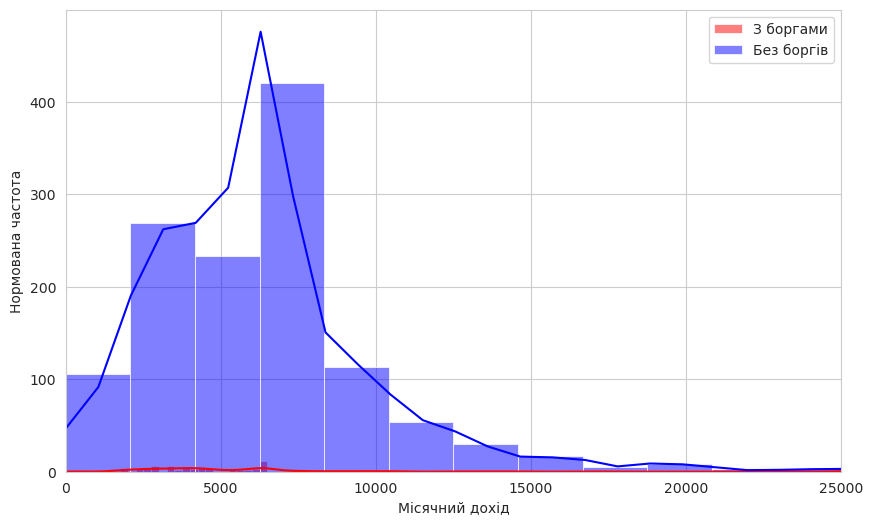

In [23]:
#9b Постройте на одном графике две **нормированные** плотности распределения: красную – для месячного дохода клиентов с задолженностями, синюю – для месячного дохода клиентов без задолженностей. По оси абсцисс отобразите значения до 25000.

income_with_debt = df[df['SeriousDlqin2yrs'] == 1]['MonthlyIncome']
income_without_debt = df[df['SeriousDlqin2yrs'] == 0]['MonthlyIncome']

# Встановлюємо стиль графіку
sns.set_style('whitegrid')

# Побудова гістограмм і нормованих плотностей розподілу
plt.figure(figsize=(10, 6))
sns.histplot(income_with_debt, kde=True, color='red', label='З боргами', bins=100, kde_kws={'bw_method': 0.1})
sns.histplot(income_without_debt, kde=True, color='blue', label='Без боргів', bins=100, kde_kws={'bw_method': 0.1})

# Обмежуємо ось абсцисс значеннями до 25000
plt.xlim(0, 25000)

# Додаємо підписи та легенду
plt.xlabel('Місячний дохід')
plt.ylabel('Нормована частота')
plt.legend()

# Виводимо графік
plt.show()


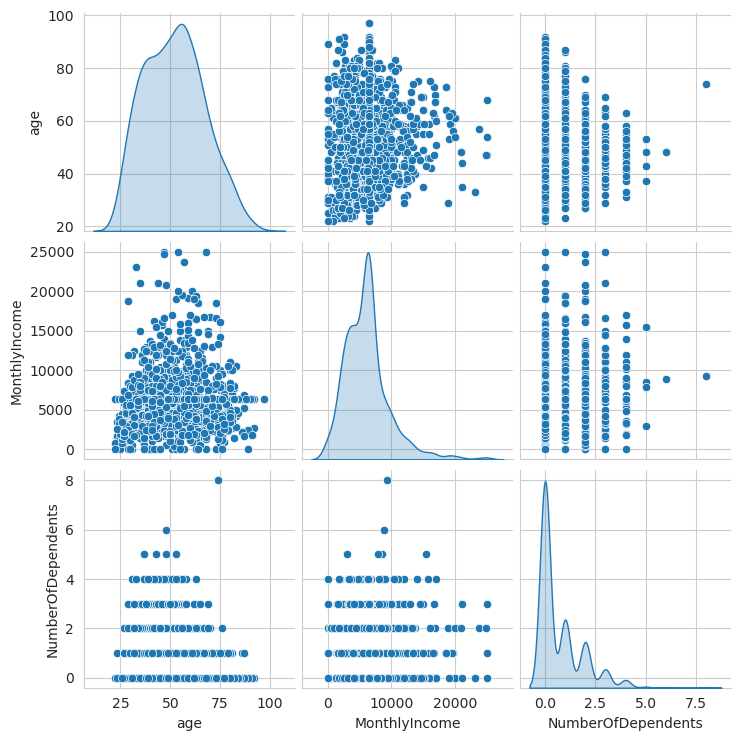

In [24]:
### 9c Візуалізуйте попарні залежності між небінарними ознаками `'age', 'MonthlyIncome', 'NumberOfDependents'`. При цьому обмежмиио місячний дохід значенням 25000.

# Обмежуємо місячний дохід значеннями до 25000
df = df[df['MonthlyIncome'] <= 25000]

# Встановлюємо стиль графіку
sns.set_style('whitegrid')

# Побудова попарних графіків розсіювання та графіків кореляції
sns.pairplot(df[['age', 'MonthlyIncome', 'NumberOfDependents']], diag_kind='kde')

# Виводимо графіки
plt.show()


In [27]:
#Між 'age' і 'MonthlyIncome' може бути слабка позитивна кореляція, де середній дохід зазвичай зростає зі збільшенням віку.
#Відсутність виражених закономірностей між 'MonthlyIncome' і 'NumberOfDependents'. Місячний дохід різних клієнтів розподілений різно.
#Зверніть увагу, що графіки кореляції на головній діаго